Iron Man Project

By Eamon and Alex

In [131]:
%matplotlib inline

from modsim import *


In [132]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

In [251]:
condition = Condition(g=-9.8*m/s**2,
                      duration = 0.3, 
                      mass=186*kg,
                      tower_height = 260 * m,
                      c_d = 1.1,
                      rho = 1.204 * kg / m**3,
                      area = 2.74 * m**2,
                      x = 0 * m,
                      y = 1 * m,
                      v_initial = 255*m/s,
                      v_final=0*m/s)

In [252]:
def make_system(condition, x_distance):
    unpack(condition)
    
    vx = v_initial
    vy = 0
    
    init = State(x=x, y=y, vx=vx, vy=vy)
    ts = linrange(0,duration, 0.0001)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, c_d=c_d, ts=ts, x_distance = x_distance)

In [253]:
system = make_system(condition, 100 * m)
    

In [254]:
def find_thrusts(system):
    unpack(system)
    
    vx=v_initial
    
    f_drag = c_d * rho * (vx**2 /2) * area
    
    a_drag = f_drag / mass

    
    T_hands = (-(v_initial**2)/(2 * x_distance)) * mass - f_drag
    time_to_building = (-v_initial)/(T_hands /mass)
    T_feet = mass * g + (mass*(2 * tower_height/(time_to_building**2)))
    vx=((T_hands/mass)*time_to_building)/2 + (x_distance/time_to_building)

    
    return(T_hands, T_feet)

In [255]:
system

,value
init,x 0 meter y ...
g,-9.8 meter / second ** 2
mass,186 kilogram
area,2.74 meter ** 2
rho,1.204 kilogram / meter ** 3
c_d,1.1
ts,"[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, ..."
x_distance,100 meter


In [256]:
find_thrusts(system)

(<Quantity(-178456.43070000003, 'kilogram * meter / second ** 2')>,
 <Quantity(1367401.0123679177, 'kilogram * meter / second ** 2')>)

In [257]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    
    dxdt = vx
    dydt = vy
    
    
    if x <= (x_distance/2):
        T_hands, T_feet = find_thrusts(system)
    else:
        T_hands, T_feet = find_thrusts(system)
        T_feet = 0
    
    a_T_hands = T_hands / mass
    a_T_feet = T_feet / mass
    
    ax = - a_T_hands #-a_drag


    ay = g + a_T_feet
    
    print (t, x)
    
    return(dxdt,dydt,ax,ay)

In [258]:
slope_func(system.init, 0, system)

0 0 meter


(<Quantity(255.0, 'meter / second')>,
 0,
 <Quantity(959.4431758064518, 'meter / second ** 2')>,
 <Quantity(7341.818346064073, 'meter / second ** 2')>)

In [259]:
run_odeint(system, slope_func)

0.0 0 meter
0.0 0.0
9.839840789554909e-09 2.50915940134e-06
9.839840789554909e-09 2.50915949423e-06
1.9679681579109818e-08 5.01831898846e-06
1.9679681579109818e-08 5.01831908136e-06
9.84180875771282e-05 0.0251012589731
0.00019681649547267728 0.0502067891926
0.0002952149033682264 0.0753216089777
0.0012791989823237172 0.32698073293
0.002263183061279208 0.579568813433
0.003247167140234699 0.833085850486
0.013087007929789608 3.41934883126
0.022926848719344514 6.09850746705
0.032766689508899424 8.87056175783
0.1311650974044485 41.7003656907
0.22956350529999758 83.8197351237
0.22956350529999758 83.8197351237
0.22956350529999758 83.8197351237
0.13167346149858733 41.8940978232
0.13218182559272615 42.0880779084
0.13269018968686497 42.2823059464
0.1337069178751426 42.6715058809
0.13472364606342024 43.0616976265
0.13574037425169788 43.4528811832
0.14590765613447423 47.4192663638
0.1560749380172506 51.4848326596
0.1560749380172506 51.4848326596
0.1560749380172506 51.4848326596
0.1460236381944247 4

In [260]:
system.results.head()

,x,y,vx,vy
0.0000,0.000000,1.000000,255.000000,0.000000
0.0001,0.025505,1.000037,255.095944,0.734182
0.0002,0.051019,1.000147,255.191889,1.468364
0.0003,0.076543,1.000330,255.287833,2.202546
0.0004,0.102077,1.000587,255.383777,2.936727


In [261]:
xs = system.results.x
ys = system.results.y

vx = system.results.vx
vy = system.results.vy

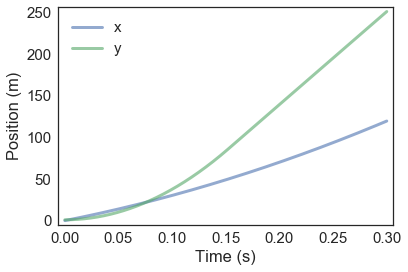

In [262]:
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

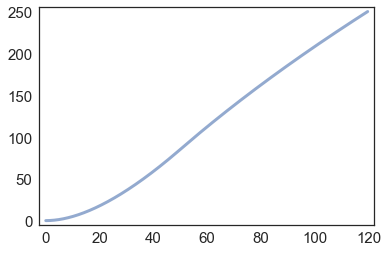

In [263]:
newfig()
plot (xs, ys)

In [246]:
distance_array = linrange(100, 1000, 100)

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


0.0 0 meter -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
0.0 0.0 -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
9.839840789554909e-09 2.50915940134e-06 -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
9.839840789554909e-09 2.50915949423e-06 -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
1.9679681579109818e-08 5.01831898846e-06 -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
1.9679681579109818e-08 5.01831908136e-06 -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
9.84180875771282e-05 0.0251012589731 -178456.43070000003 kilogram * meter ** 2 / second ** 2 1367401.0123679177 kilogram * meter / second ** 2
0.00019681649547267728 0.0502067891926 

0.2744570203505608 99.9997192687 -148219.80570000003 kilogram * meter ** 2 / second ** 2 942721.9050479176 kilogram * meter / second ** 2
0.27446119141012554 100.001695146 -148219.80570000003 kilogram * meter ** 2 / second ** 2 0
0.27446119141012554 100.001695146 -148219.80570000003 kilogram * meter ** 2 / second ** 2 0
0.27446119141012554 100.001695139 -148219.80570000003 kilogram * meter ** 2 / second ** 2 0
0.27446119141012554 100.001695153 -148219.80570000003 kilogram * meter ** 2 / second ** 2 0
0.27445717418047555 99.9997921394 -148219.80570000003 kilogram * meter ** 2 / second ** 2 942721.9050479176 kilogram * meter / second ** 2
0.27445717418047555 99.9997921394 -148219.80570000003 kilogram * meter ** 2 / second ** 2 942721.9050479176 kilogram * meter / second ** 2
0.2744573280103903 99.9998650101 -148219.80570000003 kilogram * meter ** 2 / second ** 2 942721.9050479176 kilogram * meter / second ** 2
0.2744573280103903 99.9998650102 -148219.80570000003 kilogram * meter ** 2 / s

0.5398558306332671 241.941930072 -133101.49320000003 kilogram * meter ** 2 / second ** 2 0
0.47238165843370905 200.298336329 -133101.49320000003 kilogram * meter ** 2 / second ** 2 0
0.47238165843370905 200.298336329 -133101.49320000003 kilogram * meter ** 2 / second ** 2 0
0.47238165843370905 200.298336329 -133101.49320000003 kilogram * meter ** 2 / second ** 2 0
0.47181705470412993 199.96361932 -133101.49320000003 kilogram * meter ** 2 / second ** 2 759863.0607629175 kilogram * meter / second ** 2
0.47181705470412993 199.96362073 -133101.49320000003 kilogram * meter ** 2 / second ** 2 759863.0607629175 kilogram * meter / second ** 2
0.4718614518915024 199.989931925 -133101.49320000003 kilogram * meter ** 2 / second ** 2 759863.0607629175 kilogram * meter / second ** 2
0.4718614518915024 199.989933336 -133101.49320000003 kilogram * meter ** 2 / second ** 2 759863.0607629175 kilogram * meter / second ** 2
0.4719502462662473 200.042561367 -133101.49320000003 kilogram * meter ** 2 / seco

0.42345011210310846 169.707754069 -128062.05570000001 kilogram * meter ** 2 / second ** 2 703277.6251679172 kilogram * meter / second ** 2
0.4529405624726351 186.125087107 -128062.05570000001 kilogram * meter ** 2 / second ** 2 703277.6251679172 kilogram * meter / second ** 2
0.4824310128421617 203.141204348 -128062.05570000001 kilogram * meter ** 2 / second ** 2 703277.6251679172 kilogram * meter / second ** 2
0.7773355165374278 406.235507961 -128062.05570000001 kilogram * meter ** 2 / second ** 2 0
0.7773355165374278 406.235507961 -128062.05570000001 kilogram * meter ** 2 / second ** 2 0
0.7773355165374278 406.235507961 -128062.05570000001 kilogram * meter ** 2 / second ** 2 0
0.7773355165374278 406.235507961 -128062.05570000001 kilogram * meter ** 2 / second ** 2 0
0.7773355165374278 406.235507961 -128062.05570000001 kilogram * meter ** 2 / second ** 2 0
0.7773355165374278 406.235507961 -128062.05570000001 kilogram * meter ** 2 / second ** 2 0
0.48406126996334986 204.099335332 -1280

0.7573838480025462 386.721288648 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7578474212008668 387.076552298 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7583109943991874 387.431960998 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7592381407958284 388.143213542 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7601652871924695 388.855046281 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7610924335891105 389.567459215 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7703638975555211 396.723499276 -125542.33695000001 kilogram * meter ** 2 / second ** 2 675803.8159641672 kilogram * meter / second ** 2
0.7796353615219318 403.937558824 -

0.8391041965829436 449.999702 -124702.43070000001 kilogram * meter ** 2 / second ** 2 666767.1993545839 kilogram * meter / second ** 2
0.8391051357059854 450.000469801 -124702.43070000001 kilogram * meter ** 2 / second ** 2 0
0.8391051357059854 450.000469801 -124702.43070000001 kilogram * meter ** 2 / second ** 2 0
0.8391051357059854 450.0004698 -124702.43070000001 kilogram * meter ** 2 / second ** 2 0
0.8391051357059854 450.000469801 -124702.43070000001 kilogram * meter ** 2 / second ** 2 0
0.8391043241361634 449.999806284 -124702.43070000001 kilogram * meter ** 2 / second ** 2 666767.1993545839 kilogram * meter / second ** 2
0.8391043241361634 449.999806284 -124702.43070000001 kilogram * meter ** 2 / second ** 2 666767.1993545839 kilogram * meter / second ** 2
0.8391044516893833 449.999910568 -124702.43070000001 kilogram * meter ** 2 / second ** 2 666767.1993545839 kilogram * meter / second ** 2
0.8391044516893833 449.999910568 -124702.43070000001 kilogram * meter ** 2 / second ** 2 

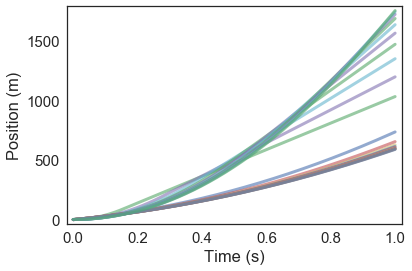

In [247]:
newfig()
decorate(xlabel='Time (s)',
         ylabel='Position (m)')

for distance in distance_array:
    system1 = make_system(condition, distance)
    run_odeint(system1, slope_func)
    xs = system1.results.x
    ys = system1.results.y
    plot(xs)
    plot(ys)